Trương Duy Kha 19146015

https://github.com/TruongDuyKha/Mnist.git

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense
from tensorflow.keras.optimizers import RMSprop
from keras.models import load_model
import numpy as np

In [ ]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

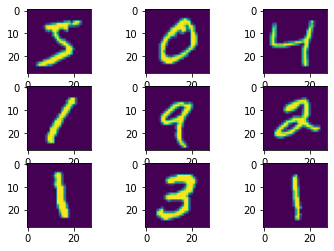

In [ ]:
for i in range(9):
  plt.subplot(330 + i +1)
  plt.imshow(x_train[i])
plt.show()

In [ ]:
x = x_test
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test/= 255

In [ ]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [ ]:
model = Sequential()
model.add(Dense(512,activation = 'relu',input_shape = (784,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = 'RMSprop', metrics = ['accuracy'])
history = model.fit(x_train,y_train,batch_size= 128,epochs = 10, verbose = 1, validation_data=(x_test,y_test))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [============================

In [ ]:
score = model.evaluate(x_test,y_test,verbose = 1)
model.save('Mnist_ANN.h5')

313/313 [==============================] - 1s 3ms/step - loss: 0.1201 - accuracy: 0.9784


In [ ]:
Model = load_model('Mnist_ANN.h5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


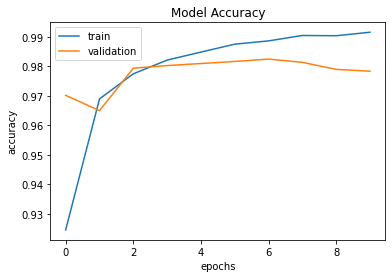

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','validation'],loc='upper_left')

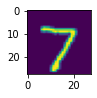

7


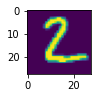

2


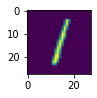

1


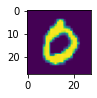

0


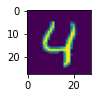

4


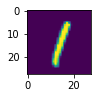

1


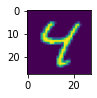

4


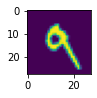

9


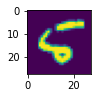

5


In [ ]:
y_pred = Model.predict(x_test)
for i in range(9):
  plt.subplot(330 + i + 1)
  plt.imshow(x[i])
  plt.show()
  print(np.argmax(y_pred[0:10],axis = 1)[i])